In [1]:
# Colab 連結 google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# copy google driver 檔案 到 colab content 資料夾
# copy Gdrive module 到 colab root(content)
!cp /content/drive/MyDrive/Colab/NFT_penguin_k-mean.csv /content

In [3]:
# *** copy colab contentr 檔案到 drive 資料夾
# *** 先存檔 保留戰果 去吃飯
# !cp /content/dic_id.json /content/drive/MyDrive/Colab/

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

1) 載入資料集

In [5]:
df_csv = pd.read_csv('NFT_penguin_k-mean.csv',index_col=0)
df_csv.head(3)

,price_value,name,Left Flipper,Right Flipper,Background,Face,Skin,Head,Body
nft_id,,,,,,,,,
1,8.140000e+17,Lil Pudgy #1,0,0,2,2,13,9,112
2,8.150000e+17,Lil Pudgy #2,0,0,4,17,7,54,128
3,8.150000e+17,Lil Pudgy #3,0,0,5,2,13,22,70


In [6]:
import warnings
warnings.filterwarnings('ignore')

df = df_csv.copy()
df.head(3)

,price_value,name,Left Flipper,Right Flipper,Background,Face,Skin,Head,Body
nft_id,,,,,,,,,
1,8.140000e+17,Lil Pudgy #1,0,0,2,2,13,9,112
2,8.150000e+17,Lil Pudgy #2,0,0,4,17,7,54,128
3,8.150000e+17,Lil Pudgy #3,0,0,5,2,13,22,70


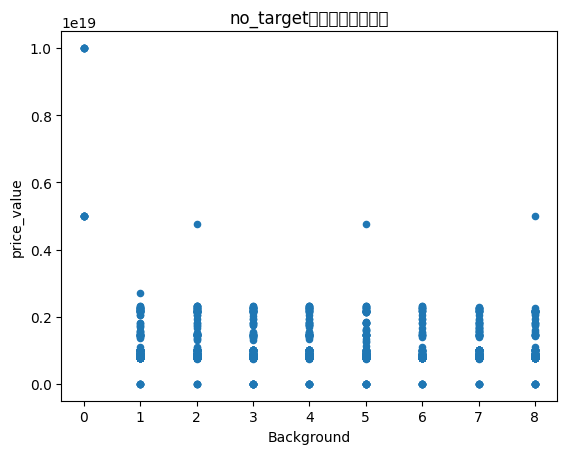

In [7]:
x_cols = ['Background','Body']
y_col = 'price_value'
x=df[x_cols]
y=df[y_col]
df.plot(kind="scatter",x='Background', y='price_value',title="no_target沒有目標值做輔助");

2) 切割訓練集與測試集

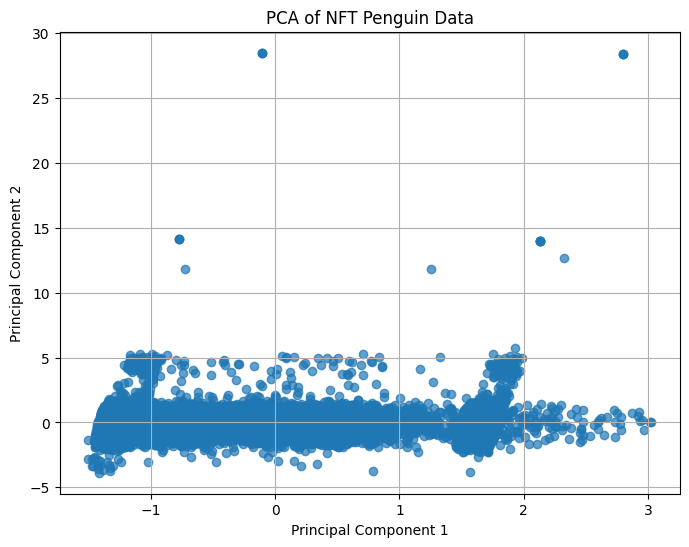

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# 這段 Python 代碼的作用是從資料框 df 中刪除指定的列，並將結果存入新的資料框 df_numeric。
# df_numeric = df.drop(columns=['nft_id', 'name'])
df_numeric = df.drop(columns=['name'])

# Standardize the data (PCA is sensitive to the scale of the data)
# 這段代碼將數據標準化，使每個特徵的均值為 0，標準差為 1，從而確保不同範圍的數據在 PCA 中不會因為尺度問題而產生偏差。標準化後的數據存儲在 df_scaled 中。
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# 參數告訴 PCA 只保留兩個主成分，也就是將原本高維的數據投影到僅有 2 個維度的空間中，這樣可以方便可視化。
# Applying PCA and reducing to 2 components for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# Plotting the PCA result to visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.title('PCA of NFT Penguin Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [9]:
df_scaled.shape

(19446, 8)

In [10]:
df_numeric.tail(3)

,price_value,Left Flipper,Right Flipper,Background,Face,Skin,Head,Body
nft_id,,,,,,,,
20007,8.290000e+17,17,39,1,7,13,102,89
20008,8.290000e+17,17,39,1,24,29,79,53
20009,8.290000e+17,17,39,8,2,5,42,47


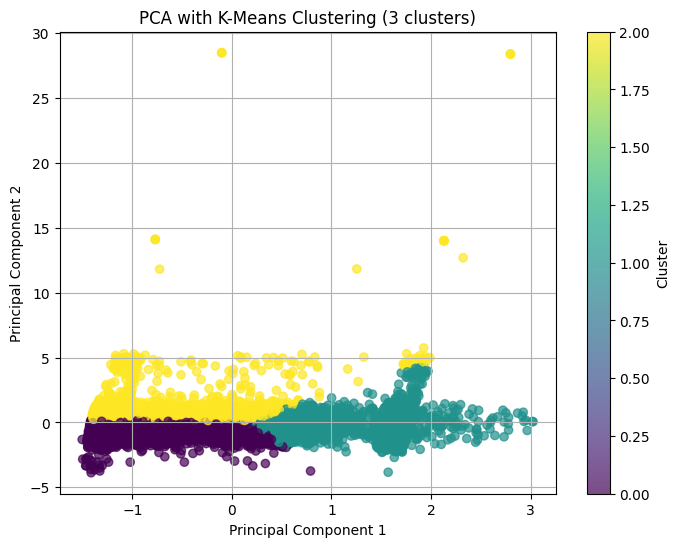

In [11]:
from sklearn.cluster import KMeans

# Applying K-means clustering to the PCA components
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_df)

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

# Plotting the PCA result with clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.7)
plt.title('PCA with K-Means Clustering (3 clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

In [12]:
print(kmeans.cluster_centers_)

[[-0.9867489  -0.55735007]
 [ 1.45512442 -0.08464169]
 [-0.88397796  0.85036317]]


In [13]:
pca_df.tail(3)

,PC1,PC2,Cluster
19443,1.759103,0.198344,1
19444,1.673893,-1.223643,1
19445,1.652480,0.568555,1


In [14]:
pca_df.head(3)

,PC1,PC2,Cluster
0,-1.385557,0.298505,2
1,-1.280065,-0.120734,0
2,-1.329635,0.255642,2


反向驗證 計算後模型

In [15]:
# 製作測試資料 (1)
# df_numeric3 = pd.DataFrame({
#     'price_value': ['8.140000e+17', '8.160000e+17', '8.170000e+17'],
#     'Left Flipper': ['1', '2', '3'],
#     'Right Flipper': ['1', '2', '3'],
#     'Background': ['1', '2', '3'],
#     'Face': ['1', '2', '3'],
#     'Skin': ['1', '2', '3'],
#     'Head': ['1', '2', '3'],
#     'Body': ['1', '2', '3']
# })
# df_numeric3

,price_value,Left Flipper,Right Flipper,Background,Face,Skin,Head,Body
0,8.140000e+17,1,1,1,1,1,1,1
1,8.160000e+17,2,2,2,2,2,2,2
2,8.170000e+17,3,3,3,3,3,3,3


In [17]:
# 製作測試資料 (2)
# 選取第5筆到第10筆資料 (從第4行到第9行，索引是從0開始的)
subset_df = df.iloc[4:10]
print(subset_df)
subset_df = subset_df.drop(columns=['name'])

         price_value           name  Left Flipper  Right Flipper  Background  \
nft_id                                                                         
7       8.150000e+17   Lil Pudgy #7             0              8           7   
8       8.150000e+17   Lil Pudgy #8             0              0           2   
9       9.940000e+17   Lil Pudgy #9             0              0           4   
14      8.160000e+17  Lil Pudgy #14             0              7           5   
15      8.160000e+17  Lil Pudgy #15             1             40           5   
17      8.160000e+17  Lil Pudgy #17             0             25           4   

        Face  Skin  Head  Body  
nft_id                          
7          2    21    29     8  
8          7    15    36   112  
9          4    23   105    40  
14         5     9    22   106  
15         8    22    52   101  
17         1    15     6   104  


In [18]:
# 1. 導入 StandardScaler
scaler = StandardScaler()

# 2. 創建 StandardScaler 實例
scaler = StandardScaler()

# 3. 標準化數據
df_scaled = scaler.fit_transform(subset_df)

# 4. 儲存標準化後的數據
df_scaled

# 1. 訓練模型和預測（已註解）
# model.fit(X) # 訓練模型
# model.predict(df_scaled) # 用模型預測

# 2. 將8維資料轉成2維
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# 3. 使用 K-means 進行預測
kmeans.predict(pca_components)

array([1, 0, 1, 0, 2, 0], dtype=int32)

預測結果分類對應的項目是 1, 0, 1, 0, 2, 0